<font size="6"> <center> **Análise Exploratória dos dados de *Covid-19* com Python**</center> </font>

<font color='blue' size="4"> Autor: Luiz Carlos </font>

## Dataset covid19 no Brasil 

Dataset disponibilizados pelo Ministério da Saúde, [Link](https://covid.saude.gov.br/)\
Data de download: 15/07/2021

### Introdução
COVID-19 é a doença causada por um novo coronavírus denominado SARS-CoV-2. A OMS tomou conhecimento deste novo vírus em 31 de dezembro de 2019, após um relatório de um grupo de casos de "pneumonia viral" em Wuhan, na República Popular da China.

### Objetivos
Com objetivo de aprendizagem à análise exploratória de dados, utilizaremos os dados da doença causada pelo coronavírus 2019 (COVID-19) no Brasil, para responder questões como: 

1 - Quantidade de mortes por covid-19 no Brasil?\
2 - Quantidade de casos de covid-19 no Brasil?\
3 - Quantidade de mortes por covid-19 nos estados brasileiros?\
4 - Quantidade de casos de covid-19 nos estados brasileiros?\
5 - Quantidade de mortes por covid-19 em algumas capitais brasileiras?\
6 - Quantidade de casos de covid-19 em algumas capitais brasileiras?\
7 - Distribuição geográfica do covid-19 no território brasileiro?

### Metodologias
Nesta análise usarei algumas ferramentas e métodos de análise de dados, tais como:
* Linguagem Python 
* Pandas (Manipulação dos dados)
* Seaborn e Matplotlib (Visualização dos dados)
* Métodos como merge, concat, drop, resample, formatação dos eixos dos gráficos, query, além de outros filtros, etc... 

### Referências
https://www.who.int/ \
https://covid.saude.gov.br/

In [1]:
import time
start_time = time.time()

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('A versão:', python_version(), 'da Linguagem Python é a Usada Neste Jupyter Notebook.')

A versão: 3.8.8 da Linguagem Python é a Usada Neste Jupyter Notebook.


In [3]:
# Importando as principais bibliotecas para a análise.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100, 'display.min_rows', 50)

## Baixando o dataset e o preparando

Os dados disponibilizados pelo ministério da saúde estão divididos em semestres, por isso tive que usar usar o método concat para cancatenizar as tabelas em um único dataframe.

In [4]:
df_part1 = pd.read_csv('COVIDBR_2020_Parte1.csv', sep=';')

In [5]:
df_part2 = pd.read_csv('COVIDBR_2020_Parte2.csv', sep=';')

In [6]:
df_part3 = pd.read_csv('COVIDBR_2021_Parte1.csv', sep=';')

In [7]:
# Unindo as tabelas:
df_covid = pd.concat([df_part1, df_part2, df_part3])

In [8]:
df_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN


In [9]:
df_municipios = pd.read_csv('municipios.csv')
df_municipios.head()

,codigo_ibge,cidade,latitude,longitude,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,31
2,5200100,Abadiânia,-16.19700,-48.7057,52
3,3100203,Abaeté,-19.15510,-45.4444,31
4,1500107,Abaetetuba,-1.72183,-48.8788,15


In [10]:
df = pd.merge(df_covid, df_municipios, how='left', left_on=df_covid['municipio'], right_on=df_municipios['cidade'])

In [11]:
# Transformando a coluna data em um objeto datetime, para em seguida usá-la como index.
# Essa atribuição nos possibilitará mais a frente fazer um resamble do dataframe por semanas, meses, quinzenas ou outro 
# período que se jugue mais interessante ou viável para a análise.

df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# verificando as alterações no dataframe:
df.head()

,key_0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,codigo_ibge,cidade,latitude,longitude,codigo_uf
data,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# O info() é uma boa opção para se conseguir algumas informações do df, de forma rápida.
# Por exemplo nº de linhas ou entradas(dados = 506), além do número de colunas e seus respectivos nomes.
# E outras informações como se há dados faltantes, o tipo dos dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2983486 entries, 2020-02-25 to 2021-07-15
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   key_0                   object 
 1   regiao                  object 
 2   estado                  object 
 3   municipio               object 
 4   coduf                   int64  
 5   codmun                  float64
 6   codRegiaoSaude          float64
 7   nomeRegiaoSaude         object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
 17  codigo_ibge             float64
 18  cidade                  object 
 19  latitude                float64
 20  longitude               float64
 21  codigo_uf       

## Limpando o df das colunas que não nos interessa.

In [13]:
# Criando uma lista de colunas que desejo excluir.
colunas_excluir=['key_0', 'coduf','codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 'semanaEpi','Recuperadosnovos',
'emAcompanhamentoNovos', 'interior/metropolitana', 'codigo_ibge', 'codigo_uf' ]

# Passando a lista para a função drop.
df = df.drop(colunas_excluir, axis=1)

# Outra forma seria passar a lista diretamente dentro da função, porém pretendo usar essa lista posteriormente.
# df = df.drop(['coduf', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 'semanaEpi', 'interior/metropolitana'], axis=1)


# Filtrando o dataframe por dados de Brasil e por estados brasileiros

## Filtros para o df Brasil

In [14]:
#  Vou mostrar diferentes formas de se fazer o mesmo filtro:
#df_Br = df.query('regiao == "Brasil"')
#df_Br = df.loc[df.regiao == 'Brasil']
df_Br = df[(df['regiao']=='Brasil')]

In [15]:
df_Br

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,210147125.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-26,Brasil,NaN,NaN,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2020-02-27,Brasil,NaN,NaN,210147125.0,1.0,0,0,0,NaN,NaN,NaN
2020-02-28,Brasil,NaN,NaN,210147125.0,1.0,0,0,0,NaN,NaN,NaN
2020-02-29,Brasil,NaN,NaN,210147125.0,2.0,1,0,0,NaN,NaN,NaN
2020-03-01,Brasil,NaN,NaN,210147125.0,2.0,0,0,0,NaN,NaN,NaN
2020-03-02,Brasil,NaN,NaN,210147125.0,2.0,0,0,0,NaN,NaN,NaN
2020-03-03,Brasil,NaN,NaN,210147125.0,2.0,0,0,0,NaN,NaN,NaN
2020-03-04,Brasil,NaN,NaN,210147125.0,3.0,1,0,0,NaN,NaN,NaN


## Filtros para o df estados:

In [16]:
# Criei um filtro onde a região é igual a Brasil, e o apliquei selecionando tudo que fosse diferente disso.
filtro = df['regiao'] == 'Brasil'
df_UF = df[~filtro]

In [17]:
df_UF

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-02-25,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-26,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-27,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-28,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-29,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-03-01,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-03-02,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-03-03,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-03-04,Norte,RO,NaN,1777225.0,0.0,0,0,0,NaN,NaN,NaN


## Obtendo informações do datafrema df_Br

# Respondendo as perguntas dos objetivos da pesquisa

### Agora com o df filtrado e preparados para os dados de interesse, podemos responder as questões dos nossos objetivos.

# 1 - Nº de mortes por Covid-19 no Brasil

In [18]:
# Crie essa função para acessar de forma rápidas os valores totais de morte em qualquer lugar daqui para frente.
# Poderia me guiar pelo describe também, já que ele oferece o valor máximo.
def total_Mortes():
    return df['obitosAcumulado'].max() 

print('O número total de mortes por covid-19 no Brasil é:', total_Mortes())   

O número total de mortes por covid-19 no Brasil é: 538942


## Nº diário de mortes por Covid-19 no Brasil

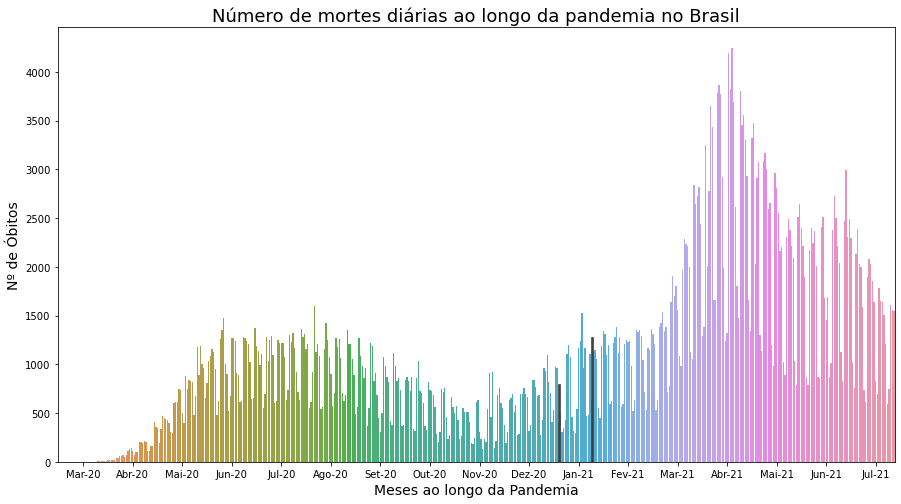

In [19]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(15,8))

sns.barplot(data=df_Br, y='obitosNovos', x=df_Br.index)

plt.title('Número de mortes diárias ao longo da pandemia no Brasil', fontsize='18')
plt.xlabel('Meses ao longo da Pandemia', fontsize='14')
plt.ylabel('Nº de Óbitos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'], rotation=0)

plt.show()

In [20]:
# Estas linhas pretas são dados duplicados, que foram inseridos como zeros:
idx = df_Br.index
df_Br.loc[idx.duplicated()]

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-12-24,Brasil,NaN,NaN,210147125.0,7425593.0,0,190006,0,NaN,NaN,NaN
2021-01-13,Brasil,NaN,NaN,210147125.0,8256536.0,0,205964,0,NaN,NaN,NaN


In [21]:
# Bom temos duas datas duplicadas. Agora é descobrir se é a primeiro ou a última data duplicado que está com problema:
df_Br.loc['2020-12-24']

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-12-24,Brasil,NaN,NaN,210147125.0,7425593.0,60076,190006,786,NaN,NaN,NaN
2020-12-24,Brasil,NaN,NaN,210147125.0,7425593.0,0,190006,0,NaN,NaN,NaN


In [22]:
# Bom temos duas datas duplicadas. Agora é descobrir se é a primeiro ou a última data duplicado que está com problema:
df_Br.loc['2021-01-13']

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2021-01-13,Brasil,NaN,NaN,210147125.0,8256536.0,60899,205964,1274,NaN,NaN,NaN
2021-01-13,Brasil,NaN,NaN,210147125.0,8256536.0,0,205964,0,NaN,NaN,NaN


In [23]:
# Bom sabendo que é o segundo dado duplicado que está com problema, posso aplicar isso a um filtro.
filtro = df_Br.index.duplicated(keep='first')
df_Br = df_Br[~filtro]

In [24]:
## Nº diário de mortes por Covid-19 no Brasil - Dados limpos

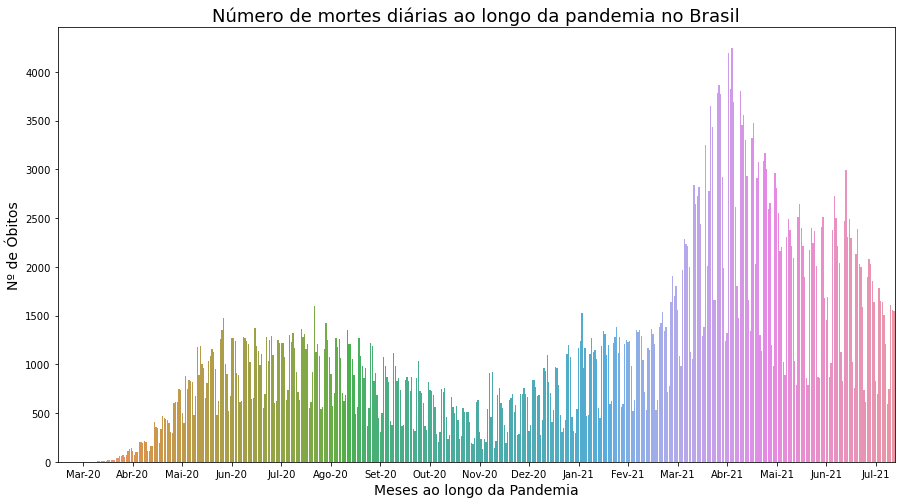

In [25]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(15,8))

sns.barplot(data=df_Br, y='obitosNovos', x=df_Br.index)

plt.title('Número de mortes diárias ao longo da pandemia no Brasil', fontsize='18')
plt.xlabel('Meses ao longo da Pandemia', fontsize='14')
plt.ylabel('Nº de Óbitos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'], rotation=0)

plt.show()

## Nº mensal de mortes por Covid-19 no Brasil

In [26]:
# Aqui vou usar de fato a atribuição que fize na célula 7. 
# Vou reagrupar o df por meses, para facilitar a interpretação do gráfico.
df_Br_resampled = df_Br.query('regiao=="Brasil" ').resample('M').max()

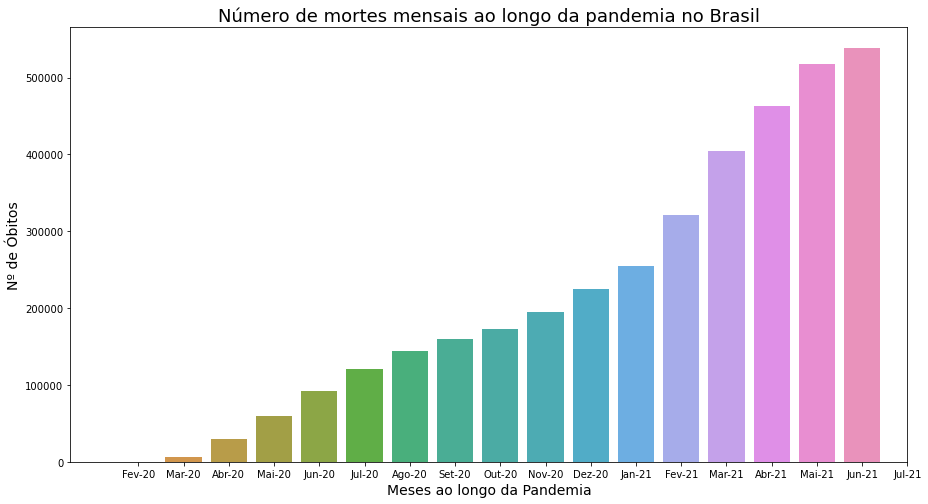

In [27]:
# Gerando gráficos para visualizar os dados do número de mortes por covid até o dado momento.

plt.figure(figsize=(15,8))

sns.barplot(data=df_Br_resampled, y='obitosAcumulado', x=df_Br_resampled.index)
plt.title('Número de mortes mensais ao longo da pandemia no Brasil', fontsize='18')
plt.xlabel('Meses ao longo da Pandemia', fontsize='14')
plt.ylabel('Nº de Óbitos', fontsize='14')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,], ['Fev-20','Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'], rotation=0)
plt.show()

# 2 - Nº de casos por Covid-19 no Brasil

In [28]:
def total_Casos():
    return df['casosAcumulado'].max()
print('O número total de casos por covid-19 no Brasil é:', total_Casos())  

O número total de casos por covid-19 no Brasil é: 19262518.0


## Nº diário de novos casos por Covid-19 no Brasil

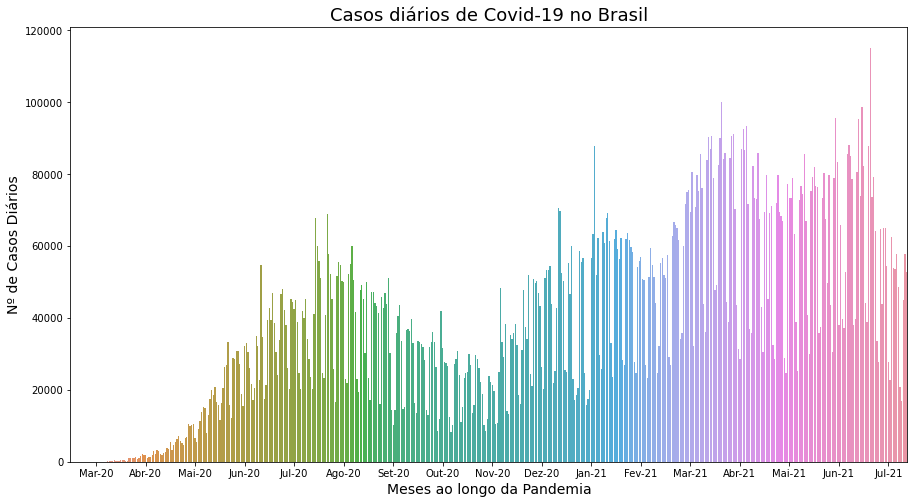

In [29]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(15,8))
sns.barplot(data=df_Br, y='casosNovos', x=df_Br.index)
plt.title('Casos diários de Covid-19 no Brasil', fontsize='18')
plt.xlabel('Meses ao longo da Pandemia', fontsize='14')
plt.ylabel('Nº de Casos Diários', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

## Nº mensal de mortes por Covid-19 no Brasil

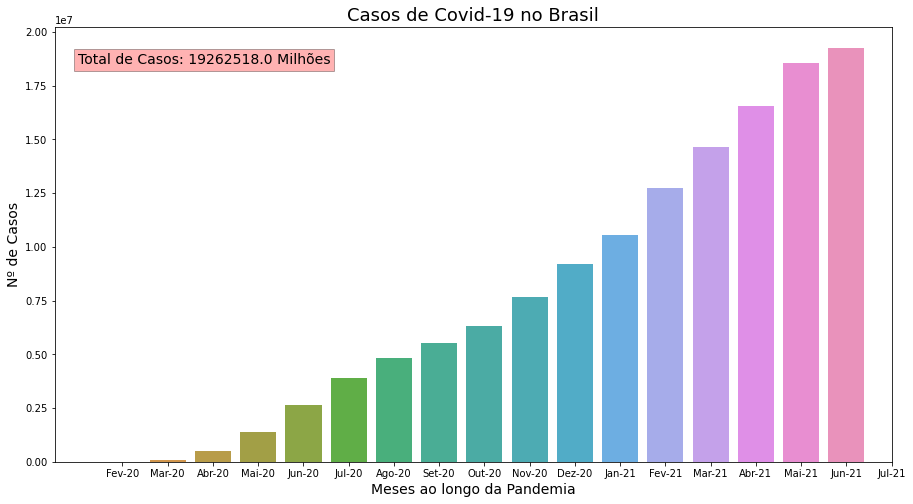

In [30]:
# Gerando gráficos para visualizar os dados do número de mortes por covid até o dado momento.
# Obs: Neste caso estou usando o df_BR_resampled do qual foi feito o resample para mensal.

plt.figure(figsize=(15,8))

sns.barplot(data=df_Br_resampled, y='casosAcumulado', x=df_Br_resampled.index)

plt.title('Casos de Covid-19 no Brasil', fontsize='18')
plt.xlabel('Meses ao longo da Pandemia', fontsize='14')
plt.ylabel('Nº de Casos', fontsize='14')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['Fev-20','Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'], rotation=0)

plt.text(0.01, 18500000, (f'Total de Casos: {total_Casos()} Milhões'), fontsize=14, bbox=dict(facecolor='red', alpha=0.3)) 
plt.show()

# Covid-19 nos estados brasileiros

In [31]:
# Criando uma lista com as colunas de interesse para construir um novo dataframe com os números de casos por estados.
colunas = ['casosAcumulado','obitosAcumulado']
df_UF = df.groupby(df['estado'], as_index=False)[colunas].max()
df_UF

,estado,casosAcumulado,obitosAcumulado
0,AC,86595.0,1774
1,AL,224758.0,5594
2,AM,409783.0,13413
3,AP,119427.0,1876
4,BA,1165822.0,25043
5,CE,906263.0,23154
6,DF,439981.0,9434
7,ES,531327.0,11692
8,GO,705878.0,19925
9,MA,329102.0,9401


## Maior número de casos resgistrados nos estados Brasileiros

In [32]:
def maior_num_casos_uf():
    return df_UF['casosAcumulado'].max()

print('O Maior número de casos resgistrados num estados Brasileiros é:', maior_num_casos_uf())

O Maior número de casos resgistrados num estados Brasileiros é: 3908279.0


# 3 - Nº de mortes por estado brasileiro

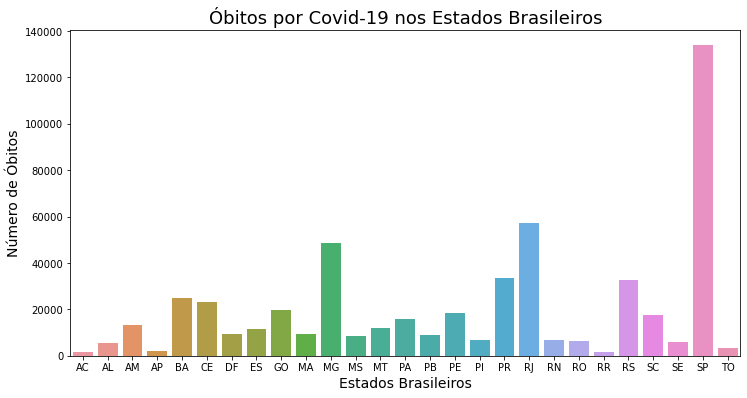

In [33]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(12,6))
sns.barplot(data=df_UF, y='obitosAcumulado', x='estado')

plt.title('Óbitos por Covid-19 nos Estados Brasileiros', fontsize='18')
plt.xlabel('Estados Brasileiros', fontsize='14')
plt.ylabel('Número de Óbitos', fontsize='14')

plt.show()

# 4 - Nº de casos por estado brasileiro

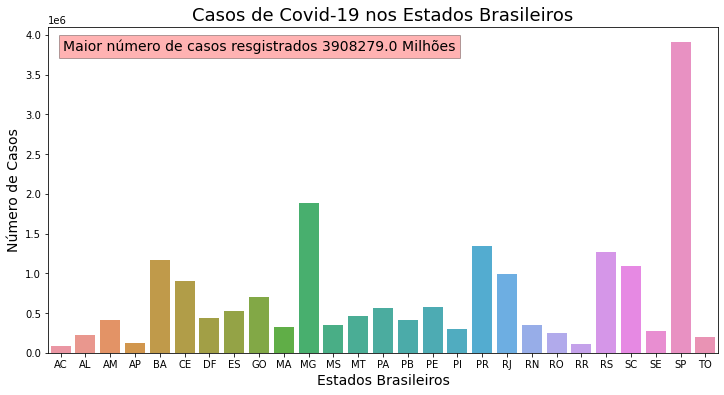

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_UF, y='casosAcumulado', x='estado')

plt.title('Casos de Covid-19 nos Estados Brasileiros', fontsize='18')
plt.xlabel('Estados Brasileiros', fontsize='14')
plt.ylabel('Número de Casos', fontsize='14')
# Adicionei este texto para facilitat a leitura dos valores.
plt.text(0.1, 3800000, (f'Maior número de casos resgistrados {maior_num_casos_uf()} Milhões'), fontsize=14, bbox=dict(facecolor='red', alpha=0.3)) 
plt.show()

# Covid-19 nas capitais brasileiras

## Criando os dataframe para as capitais

In [35]:
# Belo Horizonte
bh = df[(df['municipio'] == 'Belo Horizonte')]
bh

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-03-27,Sudeste,MG,Belo Horizonte,2512070.0,0.0,0,0,0,Belo Horizonte,-19.9102,-43.9266
2020-03-28,Sudeste,MG,Belo Horizonte,2512070.0,129.0,129,0,0,Belo Horizonte,-19.9102,-43.9266
2020-03-29,Sudeste,MG,Belo Horizonte,2512070.0,143.0,14,0,0,Belo Horizonte,-19.9102,-43.9266
2020-03-30,Sudeste,MG,Belo Horizonte,2512070.0,163.0,20,1,1,Belo Horizonte,-19.9102,-43.9266
2020-03-31,Sudeste,MG,Belo Horizonte,2512070.0,163.0,0,2,1,Belo Horizonte,-19.9102,-43.9266
2020-04-01,Sudeste,MG,Belo Horizonte,2512070.0,188.0,25,2,0,Belo Horizonte,-19.9102,-43.9266
2020-04-02,Sudeste,MG,Belo Horizonte,2512070.0,210.0,22,3,1,Belo Horizonte,-19.9102,-43.9266
2020-04-03,Sudeste,MG,Belo Horizonte,2512070.0,225.0,15,3,0,Belo Horizonte,-19.9102,-43.9266
2020-04-04,Sudeste,MG,Belo Horizonte,2512070.0,237.0,12,3,0,Belo Horizonte,-19.9102,-43.9266


In [36]:
# São Paulo
sampa = df[(df['municipio'] == 'São Paulo')]
sampa

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-03-27,Sudeste,SP,São Paulo,12252023.0,0.0,0,0,0,São Paulo,-23.5329,-46.6395
2020-03-28,Sudeste,SP,São Paulo,12252023.0,1149.0,1149,76,76,São Paulo,-23.5329,-46.6395
2020-03-29,Sudeste,SP,São Paulo,12252023.0,1183.0,34,89,13,São Paulo,-23.5329,-46.6395
2020-03-30,Sudeste,SP,São Paulo,12252023.0,1233.0,50,103,14,São Paulo,-23.5329,-46.6395
2020-03-31,Sudeste,SP,São Paulo,12252023.0,1885.0,652,121,18,São Paulo,-23.5329,-46.6395
2020-04-01,Sudeste,SP,São Paulo,12252023.0,2418.0,533,144,23,São Paulo,-23.5329,-46.6395
2020-04-02,Sudeste,SP,São Paulo,12252023.0,2815.0,397,164,20,São Paulo,-23.5329,-46.6395
2020-04-03,Sudeste,SP,São Paulo,12252023.0,3202.0,387,186,22,São Paulo,-23.5329,-46.6395
2020-04-04,Sudeste,SP,São Paulo,12252023.0,3496.0,294,212,26,São Paulo,-23.5329,-46.6395


In [37]:
# Florianópolis
floripa = df[(df['municipio'] == 'Florianópolis')]
floripa

,regiao,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,cidade,latitude,longitude
data,,,,,,,,,,,
2020-03-27,Sul,SC,Florianópolis,500973.0,0.0,0,0,0,Florianópolis,-27.5945,-48.5477
2020-03-28,Sul,SC,Florianópolis,500973.0,30.0,30,0,0,Florianópolis,-27.5945,-48.5477
2020-03-29,Sul,SC,Florianópolis,500973.0,37.0,7,0,0,Florianópolis,-27.5945,-48.5477
2020-03-30,Sul,SC,Florianópolis,500973.0,40.0,3,0,0,Florianópolis,-27.5945,-48.5477
2020-03-31,Sul,SC,Florianópolis,500973.0,56.0,16,0,0,Florianópolis,-27.5945,-48.5477
2020-04-01,Sul,SC,Florianópolis,500973.0,58.0,2,0,0,Florianópolis,-27.5945,-48.5477
2020-04-02,Sul,SC,Florianópolis,500973.0,60.0,2,0,0,Florianópolis,-27.5945,-48.5477
2020-04-03,Sul,SC,Florianópolis,500973.0,71.0,11,1,1,Florianópolis,-27.5945,-48.5477
2020-04-04,Sul,SC,Florianópolis,500973.0,90.0,19,1,0,Florianópolis,-27.5945,-48.5477


# 5 - Nº de mortes em algumas cidades:

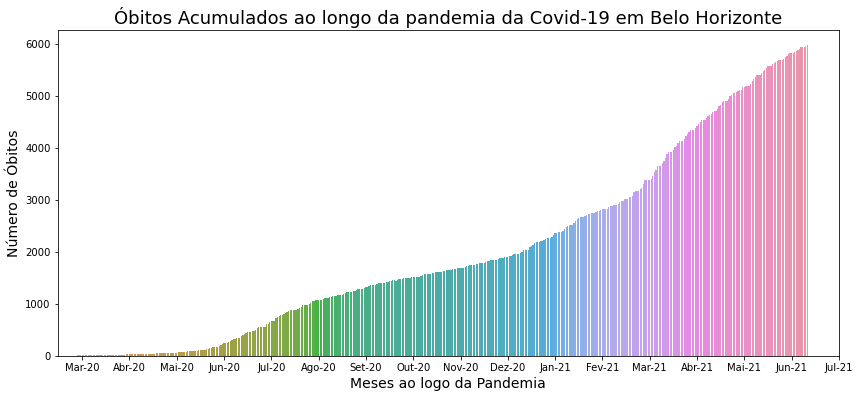

In [38]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=bh, y='obitosAcumulado', x=bh.index)

plt.title('Óbitos Acumulados ao longo da pandemia da Covid-19 em Belo Horizonte', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Óbitos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

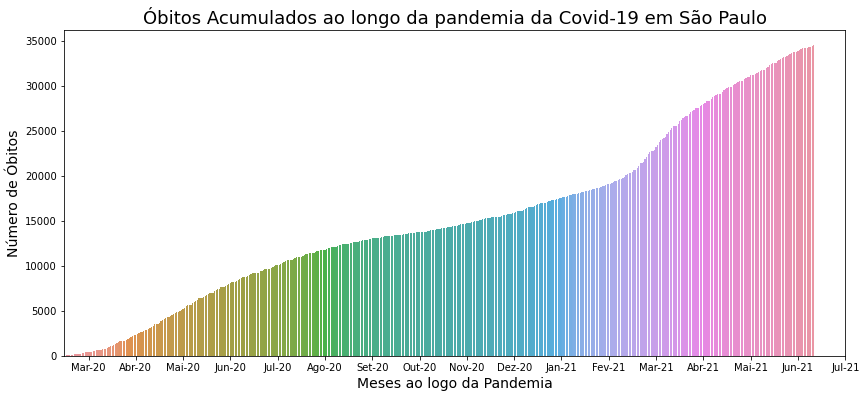

In [39]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=sampa, y='obitosAcumulado', x=sampa.index)

plt.title('Óbitos Acumulados ao longo da pandemia da Covid-19 em São Paulo', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Óbitos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

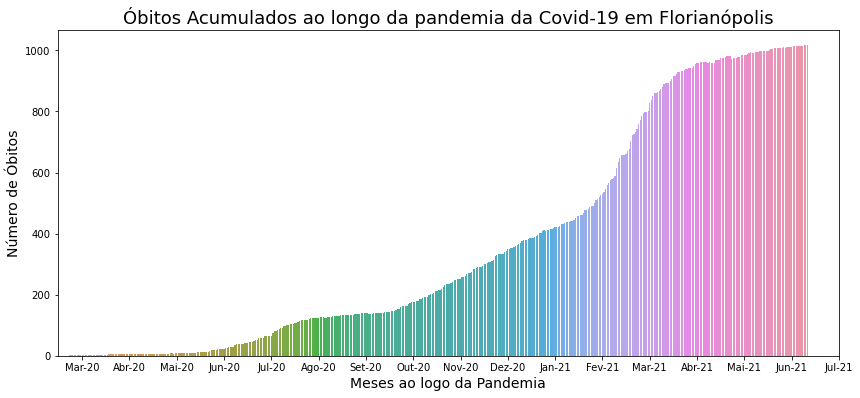

In [40]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=floripa, y='obitosAcumulado', x=floripa.index)

plt.title('Óbitos Acumulados ao longo da pandemia da Covid-19 em Florianópolis', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Óbitos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

# 6 - Nº de casos em algumas cidades:

In [41]:
# Criando uma lista com as colunas de interesse para construir um novo dataframe com os números de casos por estados.
colunas = ['casosAcumulado','obitosAcumulado']
df_ci = df.groupby(df['municipio'], as_index=False)[colunas].max()
df_ci

,municipio,casosAcumulado,obitosAcumulado
0,Abadia de Goiás,1536.0,36
1,Abadia dos Dourados,462.0,14
2,Abadiânia,452.0,38
3,Abaetetuba,8911.0,220
4,Abaeté,1399.0,31
5,Abaiara,586.0,15
6,Abaré,984.0,11
7,Abatiá,1078.0,19
8,Abaíra,289.0,12
9,Abdon Batista,425.0,4


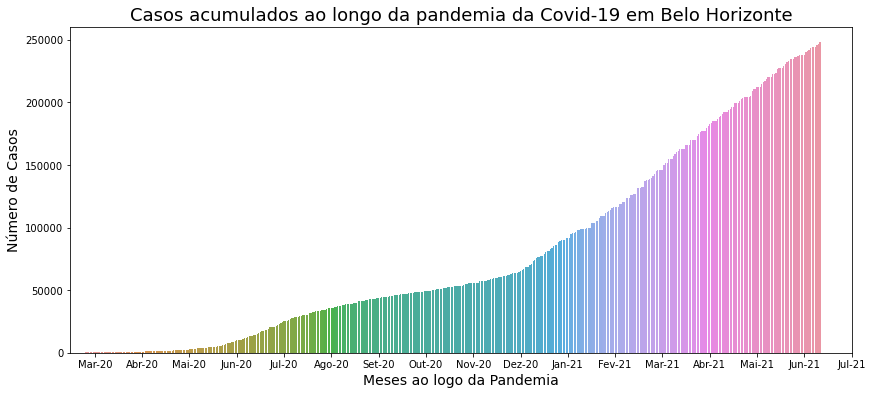

In [42]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=bh, y='casosAcumulado', x=bh.index)

plt.title('Casos acumulados ao longo da pandemia da Covid-19 em Belo Horizonte', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Casos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

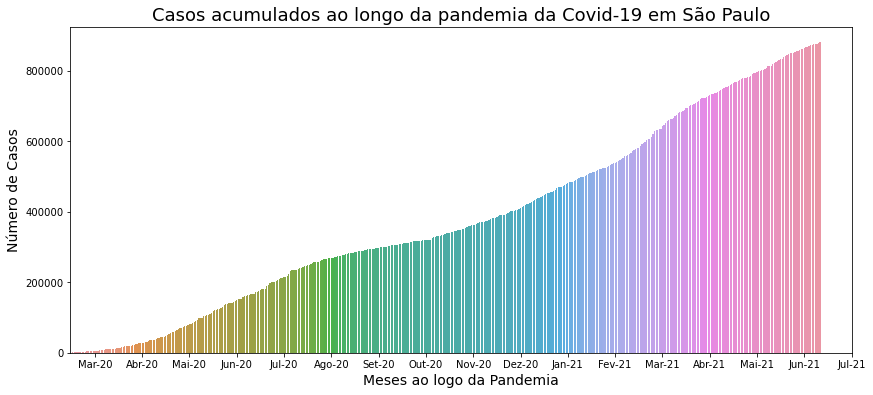

In [43]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=sampa, y='casosAcumulado', x=sampa.index)

plt.title('Casos acumulados ao longo da pandemia da Covid-19 em São Paulo', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Casos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

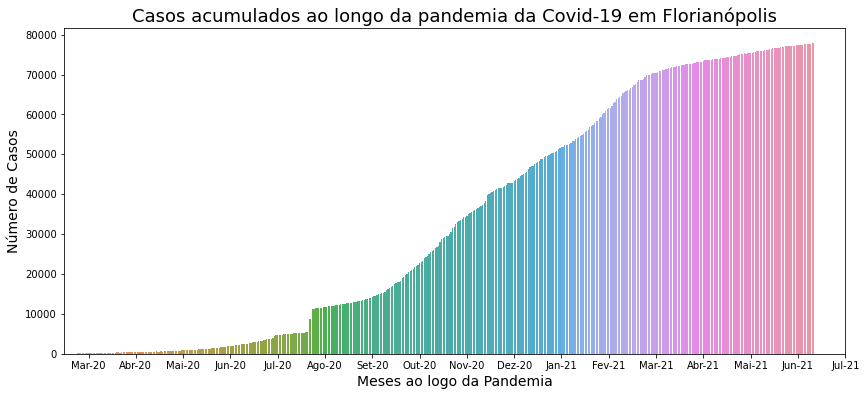

In [44]:
# Usando o matplotlib em conjunto com o seaborn para visualizar os dados de covid-19
plt.figure(figsize=(14,6))
sns.barplot(data=floripa, y='casosAcumulado', x=floripa.index)

plt.title('Casos acumulados ao longo da pandemia da Covid-19 em Florianópolis', fontsize='18')
plt.xlabel('Meses ao logo da Pandemia', fontsize='14')
plt.ylabel('Número de Casos', fontsize='14')
plt.xticks([15,45,75,105,135,165,195,225,255,285,315,345,375,405,435,465,495], ['Mar-20', 'Abr-20', 'Mai-20', 'Jun-20', 'Jul-20', 'Ago-20', 'Set-20', 'Out-20', 'Nov-20', 'Dez-20', 'Jan-21', 'Fev-21', 'Mar-21', 'Abr-21', 'Mai-21', 'Jun-21', 'Jul-21'])
plt.show()

# 7 - Distribuição geográfica do covid-19 no território brasileiro?

In [45]:
cols= ['casosAcumulado','obitosAcumulado', 'latitude', 'longitude']
df_cid = df.groupby(df['municipio'], as_index=False)[cols].max()
df_cid.head()

,municipio,casosAcumulado,obitosAcumulado,latitude,longitude
0,Abadia de Goiás,1536.0,36,-16.75730,-49.4412
1,Abadia dos Dourados,462.0,14,-18.48310,-47.3916
2,Abadiânia,452.0,38,-16.19700,-48.7057
3,Abaetetuba,8911.0,220,-1.72183,-48.8788
4,Abaeté,1399.0,31,-19.15510,-45.4444


## Distribição da covid-19 pelo Brasil

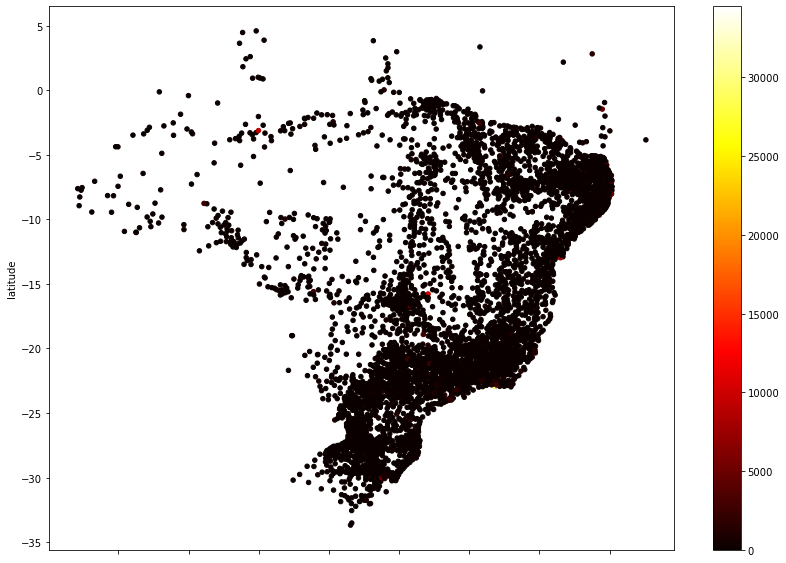

In [46]:

df_cid.plot.scatter(y='latitude', x='longitude', c=df_cid['obitosAcumulado'], figsize=(14,10), cmap='hot')
plt.show()

## Como é de se perceber o mapa não é muito informativo, já que se encontra quase todo da mesma cor.
### Para resolver o problema é precivo analizar os valores máximo e mínimos para que possamos plotar um gráfico coom valores normalizado.

[link para saber mais sobre os normalização do cmap](https://www.ti-enxame.com/pt/python-3.x/como-os-parametros-c-e-cmap-se-comportam-em-um-grafico-de-dispersao-de-matplotlib/807324958/)

In [47]:
# Com o describe consigo descobrir os valores comuns, e tentar excluir os outliers.
df_cid[['casosAcumulado','obitosAcumulado']].describe()

,casosAcumulado,obitosAcumulado
count,5297.000000,5297.000000
mean,3631.383991,103.354163
std,18146.721206,733.116207
min,10.000000,0.000000
25%,430.000000,9.000000
50%,946.000000,20.000000
75%,2368.000000,52.000000
max,881096.000000,34523.000000


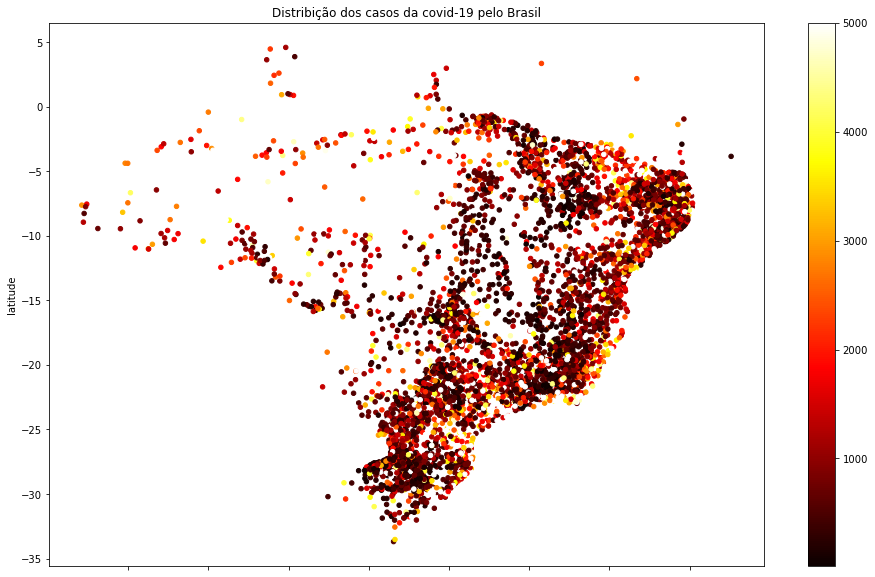

In [48]:
cmap = plt.cm.hot
norm = plt.Normalize(vmin=10, vmax=5000)
dados = df_cid['casosAcumulado']
title = 'Distribição dos casos da covid-19 pelo Brasil'

df_cid.plot.scatter(y='latitude', x='longitude', c = dados, norm = norm , cmap=cmap, title=title, figsize=(16,10))
plt.show()

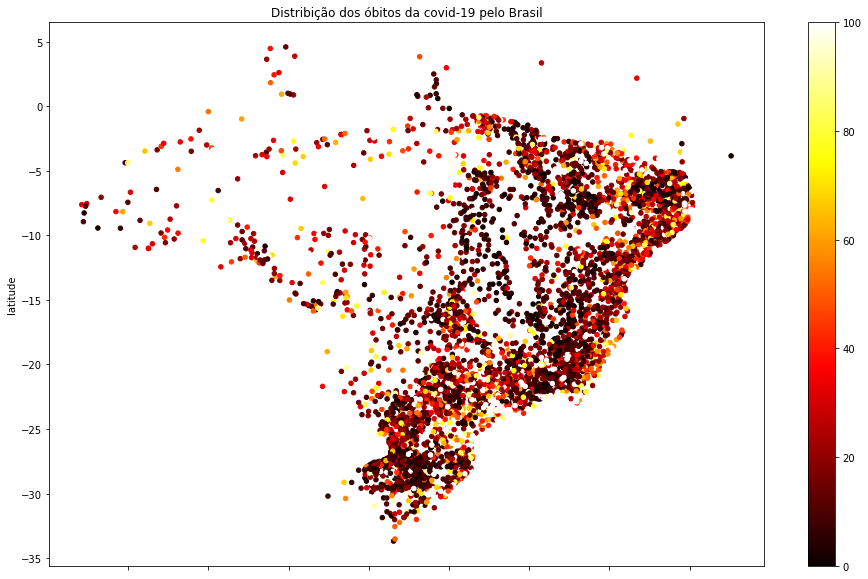

In [49]:
cmap = plt.cm.hot
norm = plt.Normalize(vmin=0, vmax=100)
dados = df_cid['obitosAcumulado']
title = 'Distribição dos óbitos da covid-19 pelo Brasil'

fig = df_cid.plot.scatter(y='latitude', x='longitude', c = dados, norm = norm , cmap=cmap, title=title, figsize=(16,10))
fig.figure.savefig('banner.png')
plt.show()


# FIM

In [50]:
# Tempo de execução do script
end_time = time.time()
process_time = end_time - start_time
print('%.3f secs' %process_time)

25.707 secs
